## Введение в анализ данных, ИАД-2

## НИУ ВШЭ, 2019-20 учебный год

### Домашнее задание №2

Задание выполнил(а): Степанов Николай

### Общая информация

__Дата выдачи:__ 04.03.2019

__Дедлайн:__ 23:59 17.03.2019

### Оценивание и штрафы

Оценка за ДЗ вычисляется по следующей формуле:

$$
\text{points} \times 10 / \text{max points},
$$

где points — количество баллов, которое вы набрали, max_points - максимальное число баллов за задание. Бонусные задания отмечены звездочками (*)

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).


# kNN своими руками (4)

Реализуйте взвешенный алгоритм kNN для регрессии. Пусть нам нужно вычислить значение $y$ для некоторого $x$ при известных данных $\left(x_1, y_1\right), \ldots, \left(x_\ell, y_\ell\right)$. Предсказанием вашего регрессора будет являться

$$
\hat{y} = \frac{\sum\limits_{i=1}^kw_iy_{(i)}}{\sum\limits_{i=1}^kw_i},
$$
где $\left(x_{(1)}, y_{(1)}\right), \ldots, \left(x_{(k)}, y_{(k)}\right)$ - ближайшие $k$ объектов к $x$ по некоторой метрике $d(\cdot, \cdot)$, а $w_i = \frac{1}{d\left(x, x_{(i)}\right)}$. Ваш алгоритм должен уметь работать с двумя метриками:

$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_2 = \sqrt{\sum\limits_{j=1}^n\left(x_{(i)}^j - x^j\right)^2}\qquad\text{(евклидова)}
$$
$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_1 = \sum\limits_{j=1}^n\left|x_{(i)}^j - x^j\right|\qquad\text{(манхэттена)}
$$

Сверьте для нескольких комбинаций различных параметров свой результат на искусственной выборке с результатом соответствующего алгоритма из `sklearn` по метрике качества MSE.

In [1]:
from sklearn.neighbors import KDTree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSA
import numpy as np

class KNN:
    def __init__(self, metric='minkowski', k=5, p=2):

        self.n_neighbors = k
        self.metric = metric
        self.k = k
        self.p = p
        
        self.X_train = None
        self.y_train = None
        
    def fit(self, X_train, y_train):

        self.X_train = X_train
        self.y_train = y_train
        
        return self
        
    def predict(self, X_test):
        
        y_pred = np.array([])
        tree = KDTree(self.X_train, metric=self.metric, p=self.p)
        
        for X in X_test:
            dist, ind = tree.query(X.reshape(1, -1), k=self.n_neighbors)
            weights = 1/dist[0]
            target = np.array([self.y_train[i] for i in ind[0]])
            y_pred = np.append(y_pred, np.sum(weights*target/(np.sum(weights))))
        
        return y_pred

In [2]:
np.random.seed(777)
X_train = np.random.randn(1000, 50)
y_train = np.random.randn(1000,)
X_test = np.random.randn(500, 50)
y_test = np.random.randn(500,)

In [3]:
MyKnn = KNN(p=2)
MyKnn.fit(X_train, y_train)
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [4]:
print('Euclid metric')
print('MSE Sklearn knn', MSE(y_test, knn.predict(X_test)))
print('MSE MyKNN', MSE(y_test, MyKnn.predict(X_test)))

Euclid metric
MSE Sklearn knn 1.3135316889013633
MSE MyKNN 1.3122773539133659


In [5]:
MyKnn = KNN(p=1)
MyKnn.fit(X_train, y_train)
knn = KNeighborsRegressor(n_neighbors=5, p=1)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=1,
          weights='uniform')

In [6]:
print('Manhattan metric')
print('MSE Sklearn knn', MSE(y_test, knn.predict(X_test)))
print('MSE MyKNN', MSE(y_test, MyKnn.predict(X_test)))

Manhattan metric
MSE Sklearn knn 1.3187271701907253
MSE MyKNN 1.3173365928342433


# Линейная регрессия своими руками (4)

Реализуйте линейную регрессию с градиентным спуском для [функции потерь Хьюбера](https://en.wikipedia.org/wiki/Huber_loss):

$$
L_\delta\left(y, \hat{y}\right) =
\begin{cases}
\frac{1}{2}\left(y - \hat{y}\right)^2, \qquad &|y - \hat{y}| \leq \delta\\
\delta\left|y - \hat{y}\right| - \frac{1}{2}\delta^2,\qquad & \text{otherwise}
\end{cases}
$$

В таком случае общее значение функции потерь на всем датасете $(x_1, y_1), \ldots, (x_\ell, y_\ell)$ будет равно

$$
L = \frac{1}{\ell}\sum\limits_{i=1}^\ell L_\delta\left(y_i, \hat{y}_i\right)
$$

Проверьте работу вашего метода: выведите результаты его работы на той же искусственной выборке, что и в задаче выше (в качестве метрик качества используйте MSE и Huber loss). Постройте график зависимости значения функции потерь от итерации градиентного спуска.

*Вы можете опустить единичный признак в модели и не добавлять его в данные. Для данной искусственной выборки это не актуально, потому что целевая переменная в этом случае является случайной величиной из стандартного нормального распределения со средним 0.*

*Вектор весов в градиентном спуске можете инициализировать нулями.*

In [7]:
from sklearn.linear_model import HuberRegressor, LinearRegression

In [8]:
class LinearRegressionHuber:
    def __init__(self, delta=1.0, max_iter=1000, tol=1e-6, eta=1e-2):
        
        self.delta = delta
        self.max_iter = max_iter
        self.tol = tol
        self.eta = eta
        
        self.zero_one = []
        
        self.w = None
        self.loss_history = []
        
    def fit(self, X_train, y_train):

        self.w = (np.random.rand(X_train.shape[1]) * 4 - 2)
        
        for i in range(self.max_iter):
            grad_w = self.calc_gradient(X_train, y_train)
            if np.linalg.norm(self.w) < self.tol:
                return self.loss_history
            
            self.w = self.w - self.eta*grad_w
            self.loss_history.append(self.calc_loss(X_train, y_train))
        
        return self.loss_history
        
    def predict(self, X_test):

        y_pred = X_test @ self.w
        return y_pred
    
    def calc_gradient(self, X, y):
        
        err = X @ self.w - y
        if abs(err.T @ err) <= self.delta*X.shape[0]:
            return X.T@(X@self.w - y)
        else:
            return self.delta*X.T@(np.sign(X@self.w-y))
        
    def calc_loss(self, X, y):
        
        err = X @ self.w - y
        if abs(err.T@err)<= self.delta*X.shape[0]:
            return np.sum((X @ self.w - y)**2/2)/len(y)
        else:
            return np.sum(abs(X @ self.w - y)*self.delta-self.delta**2/2)/len(y)            

In [9]:
LRH = LinearRegressionHuber(delta=1.35, eta=0.001, max_iter=100)
LRH.fit(X_train, y_train)

[6.403510923122877,
 5.240660877909808,
 4.118292410085487,
 3.031640427473877,
 2.028984419873966,
 1.1567554245619216,
 0.4967607978027303,
 0.5599233367029057,
 0.4800474581604002,
 0.4756551709053318,
 0.4752141830983196,
 0.47516370357373544,
 0.47515765642923335,
 0.47515691386389197,
 0.4751568209523097,
 0.4751568091177737,
 0.4751568075806071,
 0.4751568073762907,
 0.47515680734836835,
 0.47515680734442456,
 0.47515680734384624,
 0.4751568073437579,
 0.4751568073437439,
 0.47515680734374155,
 0.4751568073437412,
 0.4751568073437411,
 0.4751568073437411,
 0.4751568073437411,
 0.47515680734374105,
 0.4751568073437411,
 0.4751568073437411,
 0.4751568073437411,
 0.4751568073437411,
 0.4751568073437411,
 0.47515680734374105,
 0.4751568073437411,
 0.4751568073437411,
 0.4751568073437411,
 0.4751568073437411,
 0.4751568073437411,
 0.4751568073437411,
 0.4751568073437411,
 0.4751568073437411,
 0.4751568073437411,
 0.4751568073437411,
 0.4751568073437411,
 0.47515680734374105,
 0.47515

In [10]:
SHR = HuberRegressor()
SHR.fit(X_train, y_train)

HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
        tol=1e-05, warm_start=False)

In [11]:
SLR = LinearRegression()
SLR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
print('My Huber Regression MSE', MSE(y_test, LRH.predict(X_test)))
print('Sklearn Huber Regression MSE', MSE(y_test, SHR.predict(X_test)))
print('Sklearn Linear Regression MSE', MSE(y_test, SLR.predict(X_test)))

My Huber Regression MSE 1.1318238870202781
Sklearn Huber Regression MSE 1.1382098941787469
Sklearn Linear Regression MSE 1.1335451079631622


In [13]:
def HuberLoss(y, y_pred, delta):
    loss = []
    for i in range(y.shape[0]):
        if abs(y[i] - y_pred[i]) <= delta:
            loss.append((y[i] - y_pred[i])**2/2)
        else:
            loss.append(abs(y[i] - y_pred[i])*delta - delta**2/2)
    return np.sum(loss)/y.shape[0]

In [14]:
print('My Huber Regression Huber Loss', HuberLoss(y_test, LRH.predict(X_test), delta = 1))
print('Sklearn Huber Regression Huber Loss', HuberLoss(y_test, SHR.predict(X_test), delta = 1))
print('Sklearn Linear Regression Huber Loss', HuberLoss(y_test, SLR.predict(X_test), delta = 1))

My Huber Regression Huber Loss 0.46949822917674816
Sklearn Huber Regression Huber Loss 0.47129108691709143
Sklearn Linear Regression Huber Loss 0.4701487722281173


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

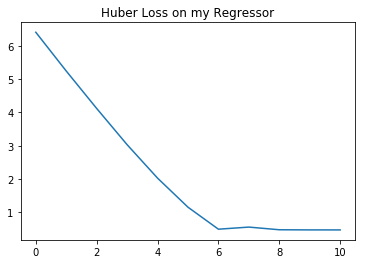

In [16]:
plt.plot(range(11), LRH.loss_history[:11])
plt.title('Huber Loss on my Regressor')
plt.show()

# Практика

Пожалуйста, при использовании различных функций из библиотек импортируйте все, что вам понадобилось в данной части, в следующем блоке:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random

from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, f_regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures

%matplotlib inline

В этом домашнем задании вы поработаете с данными из другого соревнования на Kaggle: https://www.kaggle.com/c/house-prices-advanced-regression-techniques. Задача - предсказание цены дома.

In [3]:
data = pd.read_csv('train2.csv', header=0)

In [4]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [8]:
data.drop('Id', axis=1, inplace=True)

Есть ли в данных пропуски? Если да, то для каждого столбца, в котором они имеются, посчитайте их количество и их долю от общего числа значений. Что вы наблюдаете?

In [9]:
print('В данных пропуски есть?', data.isnull().any().any())
print('\nПропуски по столбцам:')
zero = data.isnull().sum()
zero[zero != 0]

В данных пропуски есть? True

Пропуски по столбцам:


LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [10]:
print('\nДоля пропусков:')
zero[zero != 0]/data.shape[0]


Доля пропусков:


LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

## 2 (1)

Избавьтесь от пропусков. Для каждого из примененных методов обоснуйте свое решение. **Проверьте, что вы действительно избавились от пропусков.**

*Напоминание. В зависимости от типа столбца, можно заполнить пропуски, например, средним арифметическим, медианой, модой, можно какими-то отдельными значениями. А можно такие столбцы вообще удалить.*

In [14]:
print('Типы облицовки: ', data.MasVnrType.unique())
data.MasVnrType.value_counts()

Типы облицовки:  ['BrkFace' 'None' 'Stone' 'BrkCmn' nan]


None    864
Name: MasVnrType, dtype: int64

### Самый популярный тип облицовки - без облицовки, поэтому, то небольшое количество пропусков в данном признаке, заполним самым популярным типом. Площадь облицовки возьмем мат. ожиданием по всему столбцу.

In [27]:
data.MasVnrType.fillna('None', inplace=True)
data.MasVnrArea.fillna(data.MasVnrArea.mean(), inplace = True)

In [28]:
print('Типы электрических систем: ', data.Electrical.unique())
data.Electrical.value_counts()

Типы электрических систем:  ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]


SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

### Единственный пропущенный признак в эл. системе заполним самой популярной системой

In [29]:
data.Electrical.fillna('SBrkr', inplace = True)

In [30]:
data.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

### Пропуски в высоте подвала запонлним случайно двумя значениями - TA и Gd

In [31]:
data.BsmtQual.fillna(0, inplace = True)

In [32]:
data.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

### Пропуски в качестве, стенах, а также FinType2 подвала заполним самым популярным классом. Fin Type1 заполним по аналогии с высотой подвала

In [33]:
data.BsmtCond.fillna(0, inplace = True)

In [34]:
data.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [35]:
data.BsmtExposure.fillna('No', inplace = True)

In [36]:
data.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [37]:
data.BsmtFinType1.fillna(np.random.choice(['Unf', 'GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ'], p=[0.30, 0.29, 0.15, 0.10, 0.09,0.07]), inplace = True)

In [38]:
data.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [39]:
data.BsmtFinType2.fillna('Unf', inplace = True)

## По аналогии будем действовать и в остальных случаях: в зависимости от колличества пропущенных значений и распределения значений в признаке - будем заполнять либо самым популярным классом, либо по распределению вероятностей в этом признаке. Если признак числовой, то будем рассматривать средние значения

In [40]:
data.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [41]:
data.FireplaceQu.fillna(np.random.choice(['Gd', 'TA'], p=[0.55, 0.45]), inplace = True)

In [42]:
data.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [43]:
data.GarageType.fillna(np.random.choice(['Attchd', 'Detchd'], p=[0.7, 0.3]), inplace=True)

In [44]:
data.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [45]:
data.GarageFinish.fillna(np.random.choice(['Unf', 'RFn', 'Fin'], p=[0.44, 0.31, 0.25]), inplace = True)

In [46]:
data.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [47]:
data.GarageQual.fillna('TA', inplace=True)

In [48]:
data.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [49]:
data.GarageCond.fillna('TA', inplace=True)

In [50]:
print('Самый старый гараж: ', data.GarageYrBlt.min())
print('Самый новый гараж: ', data.GarageYrBlt.max())
print('Средний возраст гаражей: ', data.GarageYrBlt.mean())

Самый старый гараж:  1900.0
Самый новый гараж:  2010.0
Средний возраст гаражей:  1978.5061638868744


/home/nikstep/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/nikstep/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


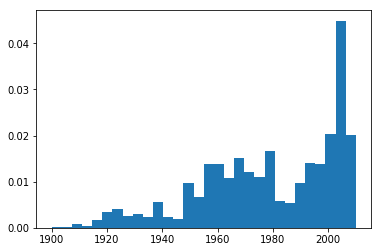

In [51]:
count, bins, ignored = plt.hist(data.GarageYrBlt, 30, density=True)
plt.show()

In [52]:
data.GarageYrBlt.fillna(np.random.choice([1920, 1940, 1960, 1980, 2000, 2010], p=[0.03, 0.07, 0.15, 0.15, 0.2, 0.4]), inplace = True)

In [53]:
data.PoolQC.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [54]:
data.PoolQC.fillna(0, inplace=True)

In [55]:
data.Fence.value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [56]:
data.Fence.fillna(np.random.choice(['MnPrv', 'GdPrv', 'GdWo', 'MnWw'], p=[0.55, 0.2, 0.19, 0.06]), inplace = True)

In [57]:
data.MiscFeature.value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [58]:
data.MiscVal.value_counts()

0        1408
400        11
500         8
700         5
450         4
2000        4
600         4
1200        2
480         2
1150        1
800         1
15500       1
620         1
3500        1
560         1
2500        1
1300        1
1400        1
350         1
8300        1
54          1
Name: MiscVal, dtype: int64

In [59]:
data.MiscFeature.fillna('No', inplace=True)

In [60]:
data.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [61]:
data.Alley.fillna(0, inplace = True)

In [62]:
data.LotFrontage.fillna(data.LotFrontage.mean(), inplace=True)

In [63]:
print('В данных пропуски есть?', data.isnull().any().any())

В данных пропуски есть? False


## 3 (1)

Обработайте категориальные признаки. В их обнаружении вам может помочь синтаксис `pandas` (например, можно обратить внимание на типы столбцов), а также описание датасета и его исследование. Объясните выбор метода (one-hot-encoding, label encoding, ...)

In [64]:
data.dtypes[(data.dtypes != 'int64') & (data.dtypes != 'float64')]

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

## Данные в признаках, которые трудно "отсортировать" по какому-то объективному критерию, заменим на вещественные значения с помощью метода OHE. В случае, когда признаки можно разделить по уровням используем label encoding (например в случае качества гаража/бассейна и т.д.)

In [65]:
data = data.join(pd.get_dummies(data.MSZoning))
data = data.join(pd.get_dummies(data.LotShape))
data = data.join(pd.get_dummies(data.LandContour))
data = data.join(pd.get_dummies(data.LandSlope))
data = data.join(pd.get_dummies(data.RoofStyle))
data = data.join(pd.get_dummies(data.RoofMatl))
data = data.join(pd.get_dummies(data.Exterior1st))
data = data.join(pd.get_dummies(data.Exterior2nd), lsuffix='_left', rsuffix='_right')
data = data.join(pd.get_dummies(data.MasVnrType), lsuffix='_left', rsuffix='_right')
data = data.join(pd.get_dummies(data.Heating), lsuffix='_left', rsuffix='_right')
data = data.drop(columns=['MSZoning', 'LotShape', 'LandContour', 'LandSlope', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Heating'])

In [66]:
data.dtypes[(data.dtypes != 'int64') & (data.dtypes != 'float64') & (data.dtypes != 'uint8')]

Street           object
Alley            object
Utilities        object
LotConfig        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType         object
SaleCondition    object
dtype: object

In [67]:
data.Street[data.Street == 'Pave'] = 2
data.Street[data.Street == 'Grvl'] = 1

/home/nikstep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/nikstep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [68]:
data.Alley[data.Alley == 'Pave'] = 2
data.Alley[data.Alley == 'Grvl'] = 1

/home/nikstep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/nikstep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [69]:
entrance_house = (4*data.Street+3*data.Alley)/7
data = data.merge(pd.DataFrame(entrance_house), left_index=True, right_index=True)
data = data.drop(columns=['Street', 'Alley'])

In [70]:
data.Utilities[data.Utilities == 'AllPub'] = 4
data.Utilities[data.Utilities == 'NoSewr'] = 3
data.Utilities[data.Utilities == 'NoSeWa'] = 2
data.Utilities[data.Utilities == 'ELO'] = 1

/home/nikstep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/nikstep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/nikstep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing import

In [71]:
data = data.join(pd.get_dummies(data.LotConfig))
data = data.drop(columns=['LotConfig'])

In [72]:
data.dtypes[(data.dtypes != 'int64') & (data.dtypes != 'float64') & (data.dtypes != 'uint8')]

Utilities        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType         object
SaleCondition    object
0                object
dtype: object

In [73]:
data = data.join(pd.get_dummies(data.Neighborhood))
data = data.join(pd.get_dummies(data.Condition1))
data = data.join(pd.get_dummies(data.BldgType))
data = data.join(pd.get_dummies(data.HouseStyle))
data = data.drop(columns=['Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'ExterQual'])


In [74]:
data.ExterCond[data.ExterCond == 'Ex'] = 5
data.ExterCond[data.ExterCond == 'Gd'] = 4
data.ExterCond[data.ExterCond == 'TA'] = 3
data.ExterCond [data.ExterCond == 'Fa'] = 2
data.ExterCond [data.ExterCond == 'Po'] = 1
data = data.drop(columns=['Foundation'])

/home/nikstep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/nikstep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/nikstep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing import

In [75]:
data.BsmtQual[data.BsmtQual == 'Ex'] = 110
data.BsmtQual[data.BsmtQual == 'Gd'] = 99
data.BsmtQual[data.BsmtQual == 'TA'] = 89
data.BsmtQual[data.BsmtQual == 'Fa'] = 79
data.BsmtQual[data.BsmtQual == 'Po'] = 69
data.BsmtCond[data.BsmtCond == 'Ex'] = 5
data.BsmtCond[data.BsmtCond == 'Gd'] = 4
data.BsmtCond[data.BsmtCond == 'TA'] = 3
data.BsmtCond[data.BsmtCond == 'Fa'] = 2
data.BsmtCond[data.BsmtCond == 'Po'] = 1

/home/nikstep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/nikstep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/nikstep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing import

In [76]:
data.dtypes[(data.dtypes != 'int64') & (data.dtypes != 'float64') & (data.dtypes != 'uint8')]

Utilities        object
ExterCond        object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType         object
SaleCondition    object
0                object
dtype: object

In [77]:
data.HeatingQC[data.HeatingQC == 'Ex'] = 5
data.HeatingQC[data.HeatingQC == 'Gd'] = 4
data.HeatingQC[data.HeatingQC == 'TA'] = 3
data.HeatingQC[data.HeatingQC == 'Fa'] = 2
data.HeatingQC[data.HeatingQC == 'Po'] = 1

/home/nikstep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/nikstep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/nikstep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing import

In [78]:
data.CentralAir[data.CentralAir == 'Y'] = 1
data.CentralAir[data.CentralAir == 'N'] = 0

/home/nikstep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/nikstep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [79]:
data.Electrical[data.Electrical == 'SBrkr'] = 4
data.Electrical[data.Electrical == 'FuseA'] = 3
data.Electrical[data.Electrical == 'FuseF'] = 2
data.Electrical[data.Electrical == 'Mix'] = 2
data.Electrical[data.Electrical == 'FuseP'] = 1

/home/nikstep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/nikstep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/nikstep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing import

In [80]:
data.KitchenQual[data.KitchenQual == 'Ex'] = 5
data.KitchenQual[data.KitchenQual == 'Gd'] = 4
data.KitchenQual[data.KitchenQual == 'TA'] = 3
data.KitchenQual[data.KitchenQual == 'Fa'] = 2
data.KitchenQual[data.KitchenQual == 'Po'] = 1

/home/nikstep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/nikstep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/nikstep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing import

In [81]:
data.FireplaceQu[data.FireplaceQu == 'Ex'] = 5
data.FireplaceQu[data.FireplaceQu == 'Gd'] = 4
data.FireplaceQu[data.FireplaceQu == 'TA'] = 3
data.FireplaceQu[data.FireplaceQu == 'Fa'] = 2
data.FireplaceQu[data.FireplaceQu == 'Po'] = 1

/home/nikstep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/nikstep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/nikstep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing import

In [82]:
data.GarageQual[data.GarageQual == 'Ex'] = 5
data.GarageQual[data.GarageQual == 'Gd'] = 4
data.GarageQual[data.GarageQual == 'TA'] = 3
data.GarageQual[data.GarageQual == 'Fa'] = 2
data.GarageQual[data.GarageQual == 'Po'] = 1

/home/nikstep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/nikstep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/nikstep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing import

In [83]:
data.PoolQC[data.PoolQC == 'Ex'] = 5
data.PoolQC[data.PoolQC == 'Gd'] = 4
data.PoolQC[data.PoolQC == 'TA'] = 3
data.PoolQC[data.PoolQC == 'Fa'] = 2
data.PoolQC[data.PoolQC == 'Po'] = 1

/home/nikstep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/nikstep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/nikstep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing import

In [84]:
data.KitchenQual.unique()

array([4, 3, 5, 2], dtype=object)

In [85]:
data = data.join(pd.get_dummies(data.Functional), lsuffix='_leftfunc')
data = data.join(pd.get_dummies(data.GarageType))
data = data.join(pd.get_dummies(data.PavedDrive), lsuffix='_leftPaved')
data = data.join(pd.get_dummies(data.MiscFeature),  lsuffix='_leftMiscFeature')
data = data.join(pd.get_dummies(data.SaleType))
data = data.join(pd.get_dummies(data.SaleCondition))
data = data.join(pd.get_dummies(data.Fence))
data = data.drop(columns=['BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Functional', 'GarageType', 'GarageFinish', 'GarageCond', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition', 'Fence'])

In [86]:
data.dtypes[(data.dtypes != 'int64') & (data.dtypes != 'float64') & (data.dtypes != 'uint8')]

Utilities      object
ExterCond      object
BsmtQual       object
BsmtCond       object
HeatingQC      object
CentralAir     object
Electrical     object
KitchenQual    object
FireplaceQu    object
GarageQual     object
PoolQC         object
0              object
dtype: object

## 4 (0.5)

Вычислите и визуализируйте попарную корреляцию Пирсона между всеми признаками. Какие выводы можно сделать?

*Для визуализации можно использовать `seaborn.heatmap()`.*

In [87]:
data.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Abnorml,AdjLand,Alloca,Family,Normal,Partial,GdPrv,GdWo,MnPrv,MnWw
MSSubClass,1.000000,-3.570559e-01,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,-0.065649,...,0.005003,0.016241,0.030002,0.000983,0.024359,-0.051068,0.001074,0.072221,-0.076225,-0.032006
LotFrontage,-0.357056,1.000000e+00,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,0.043340,...,-0.021846,-0.037020,-0.018090,0.015818,-0.072074,0.124842,0.027584,-0.020065,0.006588,-0.002338
LotArea,-0.139781,3.067946e-01,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,0.111170,...,-0.029126,-0.013208,0.008966,-0.010781,0.005711,0.022635,0.000071,0.041632,-0.045656,-0.011054
OverallQual,0.032628,2.341962e-01,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,-0.059119,...,-0.103535,-0.041677,-0.044950,-0.025515,-0.143282,0.323295,0.030543,0.137465,-0.164067,-0.057822
OverallCond,-0.059316,-5.282010e-02,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,0.040229,...,-0.046367,-0.038888,-0.033444,-0.023873,0.161642,-0.151659,0.093972,-0.177389,0.126547,0.075983
YearBuilt,0.027850,1.175980e-01,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,-0.049107,...,-0.110233,-0.045601,-0.010104,-0.035785,-0.158427,0.343895,-0.068752,0.202700,-0.176190,-0.061636
YearRemodAdd,0.040581,8.274589e-02,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,-0.067759,...,-0.135942,-0.040294,-0.020727,-0.048056,-0.120577,0.322837,-0.006923,0.119660,-0.128867,-0.023996
MasVnrArea,0.022895,1.792835e-01,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,-0.072302,...,-0.044758,-0.011959,-0.009689,-0.009914,-0.084241,0.165606,-0.017177,0.104648,-0.104046,-0.026659
BsmtFinSF1,-0.069836,2.158284e-01,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,-0.050117,...,-0.024832,-0.014874,0.021369,0.000765,-0.019560,0.044912,-0.006185,0.016024,-0.021130,0.022636
BsmtFinSF2,-0.065649,4.333957e-02,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072302,-0.050117,1.000000,...,0.048347,-0.015130,-0.026277,-0.007929,0.041207,-0.085761,0.047442,-0.103501,0.083806,0.025441


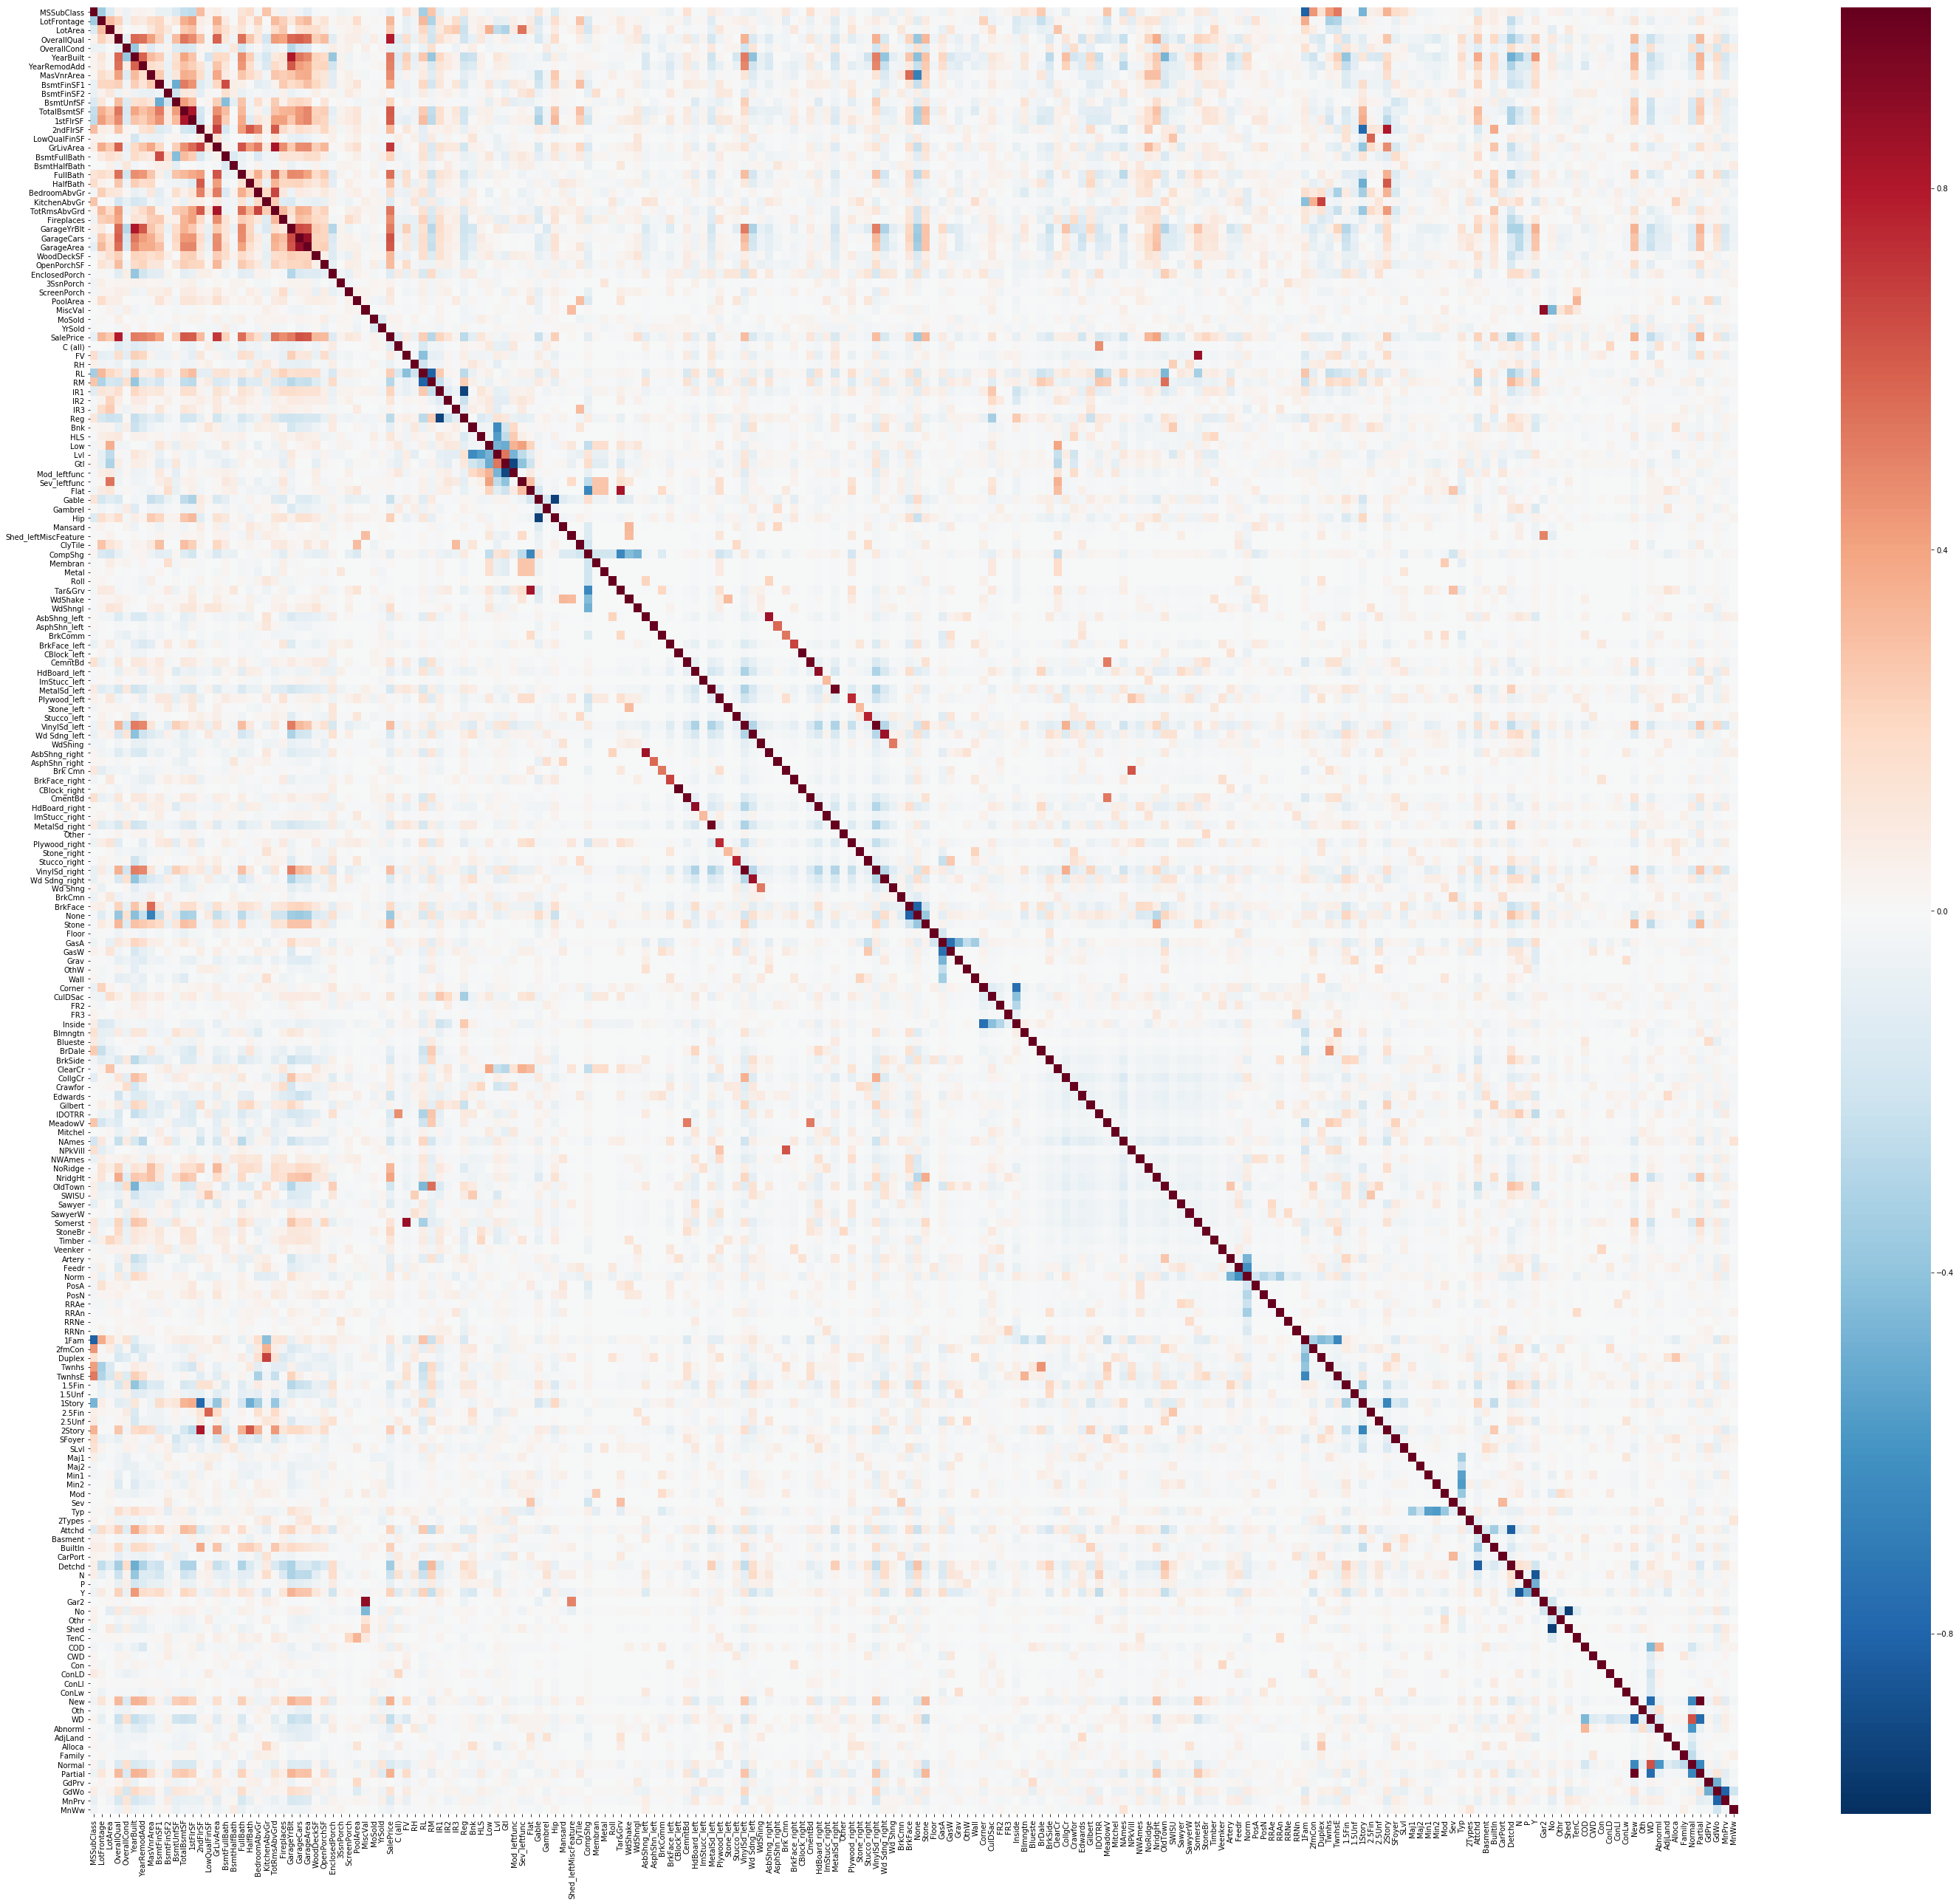

In [88]:
plt.figure(figsize=(50, 45))
ax = sns.heatmap(data.corr(), cmap=sns.color_palette("RdBu_r", 1000), vmin=-1, center=0)

## 5 (0.5)

Найдите признаки с максимальным и минимальным **абсолютным** значением коэффициента корреляции Пирсона с предсказываемым значением. Изобразите на графиках зависимость найденных признаков от предсказываемого значения.

*Не забудьте указать название графика и обозначить, что изображено по каждой из осей.*

In [89]:
corr = data.corr()['SalePrice']
corr.drop('SalePrice', inplace = True)

In [90]:
print('Минимальный коэффициентт корреляции Пирсона: ', abs(corr).idxmin())
print('Максимальный коэффициентт корреляции Пирсона: ', abs(corr).idxmax())

Минимальный коэффициентт корреляции Пирсона:  Metal
Максимальный коэффициентт корреляции Пирсона:  OverallQual


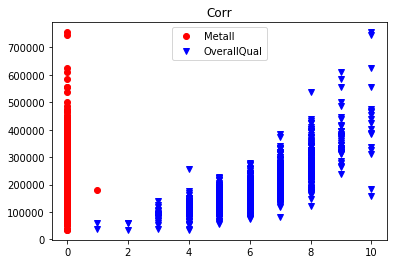

In [91]:
plt.plot(data.Metal, data.SalePrice, linestyle='none', marker='o', c = 'r', label = 'Metall')
plt.plot(data.OverallQual, data.SalePrice, linestyle='none', marker='v', c = 'b',label = 'OverallQual')
plt.title('Corr')
plt.legend()
plt.show()

## 6 (0.5)

Постройте гистограмму распределения предсказываемого значения. Для избавления от разницы в масштабах, а также «смещения» распределения переменной в сторону нормального (что бывает полезно при статистическом анализе), можно прологарифмировать ее (это обратимое преобразование, поэтому целевую переменную легко восстановить). В данном случае воспользуйтесь `numpy.log1p`, чтобы сделать преобразование $y \to \ln\left(1 + y\right)$. Постройте гистограмму распределения от нового предсказываемого значения. Опишите наблюдения.

*В дальнейшем используйте в качестве предсказываемого значения вектор, который получился после логарифмирования.*

(array([  3.,   2.,   0.,   2.,   3.,   7.,   5.,  10.,  39.,  35.,  49.,
        100., 138., 186., 146., 156., 142., 102., 100.,  68.,  52.,  44.,
         22.,  24.,  12.,   4.,   3.,   3.,   1.,   2.]),
 array([10.46027076, 10.56274421, 10.66521767, 10.76769112, 10.87016457,
        10.97263803, 11.07511148, 11.17758493, 11.28005839, 11.38253184,
        11.48500529, 11.58747874, 11.6899522 , 11.79242565, 11.8948991 ,
        11.99737256, 12.09984601, 12.20231946, 12.30479292, 12.40726637,
        12.50973982, 12.61221328, 12.71468673, 12.81716018, 12.91963363,
        13.02210709, 13.12458054, 13.22705399, 13.32952745, 13.4320009 ,
        13.53447435]),
 <a list of 30 Patch objects>)

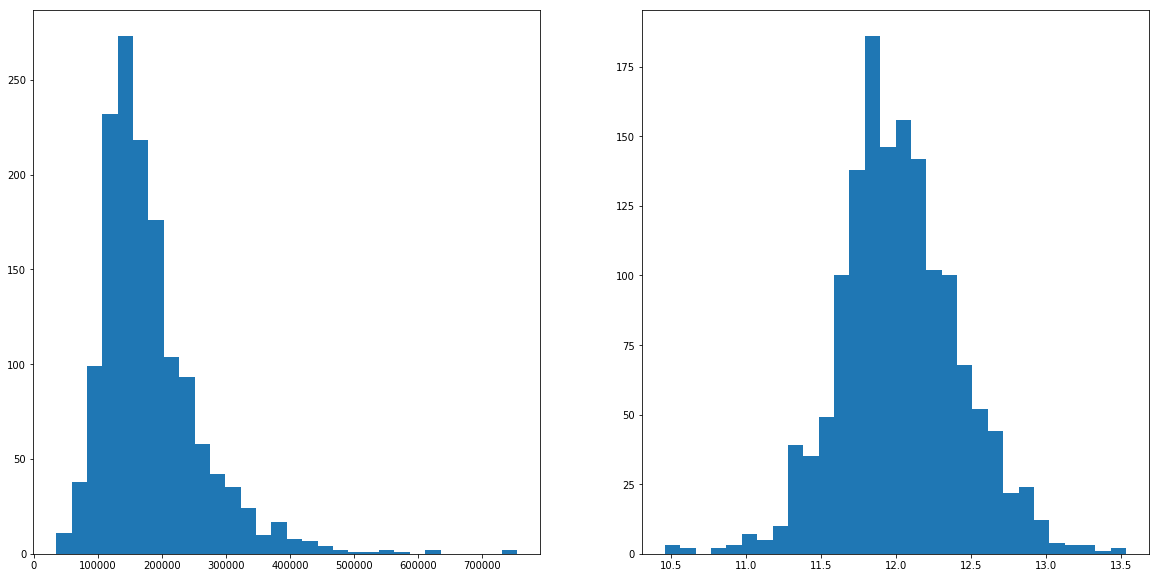

In [92]:
plt.figure(figsize=[20, 10])
plt.subplot(1, 2, 1)
plt.hist(data.SalePrice, bins=30)

plt.subplot(1, 2, 2)
plt.hist(np.log1p(data.SalePrice), bins=30)

Перейдем непосредственно к построению моделей. Разобьем выборку на обучение и контроль.

*Пожалуйста, **не меняйте** значение `random_state` в следующей ячейке.*

In [93]:
X_train, X_val, y_train, y_val = train_test_split(data.drop('SalePrice', axis=1), np.log1p(data.SalePrice), random_state=17032019, train_size=0.9)

/home/nikstep/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [94]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1314, 211), (146, 211), (1314,), (146,))

## 7 (2)

Примените к данным следующие алгоритмы:

- kNN
- линейная регрессия
- Lasso
- Ridge

Для каждого из методов подберите гиперпараметры с помощью кросс-валидации. Обучите алгоритмы с лучшими гиперпараметрами на обучающей выборке и оцените качество по метрике **Root** Mean Squared Error. Какой из методов показывает себя лучше?

In [95]:
knn = KNeighborsRegressor(n_neighbors=5, p=2)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [96]:
print('RMSE Sklearn knn', np.sqrt(MSE(y_val, knn.predict(X_val))))

RMSE Sklearn knn 0.2091452150046794


In [97]:
best_knn = GridSearchCV(knn, param_grid = {
    'n_neighbors': np.arange(1, 50)
})
best_knn.fit(X_train, y_train)

/home/nikstep/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [98]:
print('RMSE Sklearn best_knn', np.sqrt(MSE(y_val, best_knn.predict(X_val))))

RMSE Sklearn best_knn 0.2091452150046794


In [99]:
LinRegr = LinearRegression()
LinRegr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [100]:
print('RMSE Sklearn LinearRegression', np.sqrt(MSE(y_val, LinRegr.predict(X_val))))

RMSE Sklearn LinearRegression 0.1257780432153288


In [101]:
best_LinRegr = GridSearchCV(LinRegr, param_grid = {
    'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]
})
best_LinRegr.fit(X_train, y_train)

/home/nikstep/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [102]:
print('RMSE Sklearn best_LinearRegression', np.sqrt(MSE(y_val, best_LinRegr.predict(X_val))))

RMSE Sklearn best_LinearRegression 0.1257780432153288


In [103]:
LassoRegr = Lasso()
LassoRegr.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [104]:
print('RMSE Sklearn LassoRegression', np.sqrt(MSE(y_val, LassoRegr.predict(X_val))))

RMSE Sklearn LassoRegression 0.17086426123456916


In [120]:
best_LassoRegr = GridSearchCV(LassoRegr, param_grid = {
    'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False], 'normalize':[False, True],
    'positive':[False, True], 'precompute':[False, True], 'warm_start':[False, True], 
    'selection':['random', 'cyclic']
})
best_LassoRegr.fit(X_train, y_train)

/home/nikstep/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/nikstep/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/nikstep/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/nikstep/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not 

/home/nikstep/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/nikstep/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/nikstep/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/nikstep/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did no

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'fit_intercept': [True, False], 'normalize': [False, True], 'copy_X': [True, False], 'positive': [False, True], 'precompute': [False, True], 'warm_start': [False, True], 'selection': ['random', 'cyclic']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [121]:
print('RMSE Sklearn best_LassoRegression', np.sqrt(MSE(y_val, best_LassoRegr.predict(X_val))))

RMSE Sklearn best_LassoRegression 0.17367859032361524


In [110]:
RidgeRegr = Ridge()
RidgeRegr.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [111]:
print('RMSE Sklearn RidgeRegression', np.sqrt(MSE(y_val, RidgeRegr.predict(X_val))))

RMSE Sklearn RidgeRegression 0.12046566462711161


In [124]:
best_RidgeRegr = GridSearchCV(LassoRegr, param_grid = {
    'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False], 
    'normalize':[False, True], 'alpha':np.arange(0, 1, 0.1)
})
best_RidgeRegr.fit(X_train, y_train)

/home/nikstep/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/nikstep/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/home/nikstep/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/home/nikstep/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small al

/home/nikstep/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/nikstep/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/home/nikstep/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/home/nikstep/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small 

/home/nikstep/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/nikstep/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/nikstep/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/nikstep/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did no

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'fit_intercept': [True, False], 'normalize': [False, True], 'copy_X': [True, False], 'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [125]:
print('RMSE Sklearn best_RidgeRegression', np.sqrt(MSE(y_val, best_RidgeRegr.predict(X_val))))

RMSE Sklearn best_RidgeRegression 0.12577804321923702


## 8 (1)

Постройте гистограммы значений весов для линейной регрессии, Lasso и Ridge. Опишите наблюдения. В чем различия между полученными наборами весов и почему?

In [115]:
LinRArr = LinRegr.coef_
LassoRArr = LassoRegr.coef_
RidgeRArr = RidgeRegr.coef_

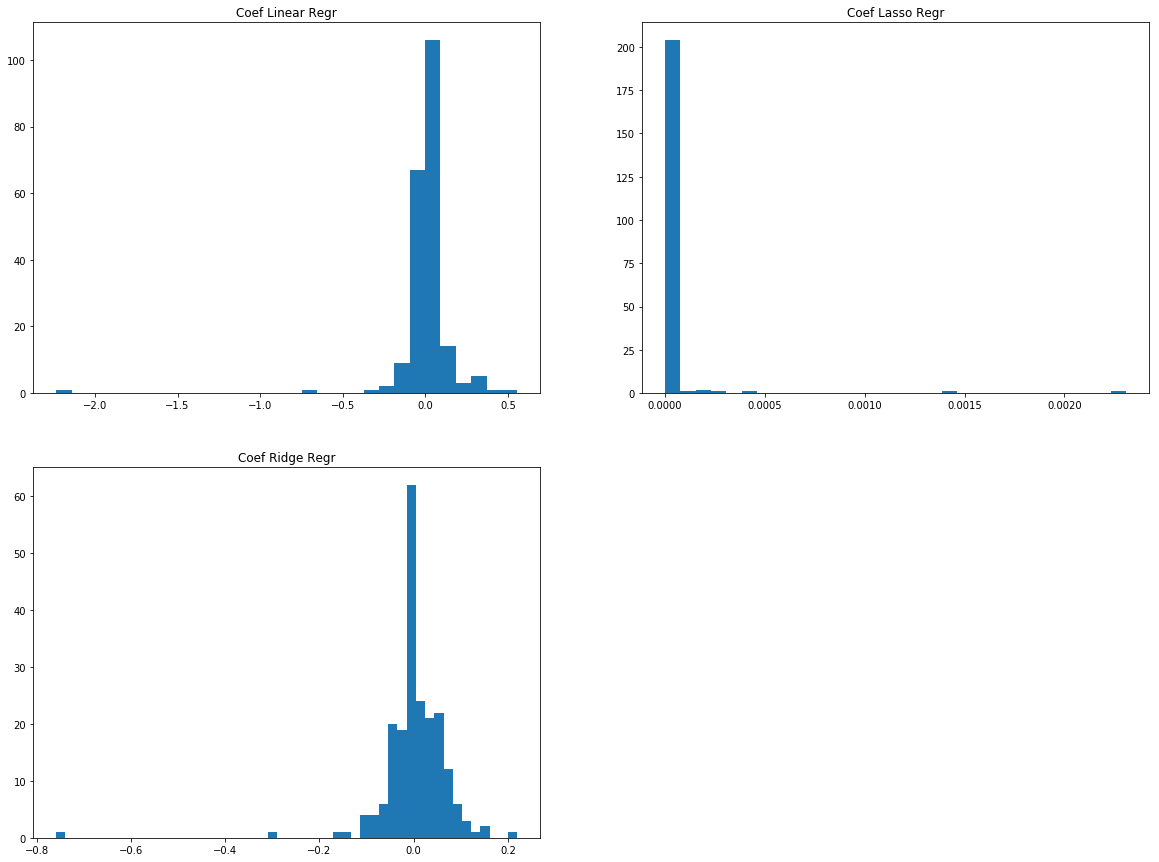

In [117]:
plt.figure(figsize=[20, 15])
plt.subplot(221)
plt.hist(LinRArr, bins=30)
plt.title('Coef Linear Regr')

plt.subplot(222)
plt.hist(LassoRArr, bins=30)
plt.title('Coef Lasso Regr')

plt.subplot(223)
plt.hist(RidgeRArr, bins=50)
plt.title('Coef Ridge Regr')
plt.show()

### Как видно из гистограм в Lasso и Ridge регрессорах значения коэффицентов значительно меньше, чем у линейной регресси (за счёт регуляризаторов).

## 9 (0.5)

Добейтесь того, чтобы в заданиях выше ваш лучший алгоритм давал качество не больше 0.125 на тестовых данных по метрике RMSE (если вы дошли до этого задания, а качество выше уже удовлетворяет этому условию, вы автоматически получите за него полный балл).

In [118]:
RidgeRegr = Ridge()
RidgeRegr.fit(X_train, y_train)
print('RMSE Sklearn RidgeRegression', np.sqrt(MSE(y_val, RidgeRegr.predict(X_val))))

RMSE Sklearn RidgeRegression 0.12046566462711161


## 10* (0.5)

Добейтесь того, чтобы в заданиях выше ваш лучший алгоритм давал качество не больше 0.121 на тестовых данных по метрике RMSE. Для этого вы можете использовать самые разные методы, какие захотите - отбор признаков, генерация новых, разные способы предобработки данных. Единственное ограничение - не использовать никакие алгоритмы регрессии, кроме kNN, линейной регрессии, Lasso и Ridge.

In [119]:
print('RMSE Sklearn RidgeRegression', np.sqrt(MSE(y_val, RidgeRegr.predict(X_val))))

RMSE Sklearn RidgeRegression 0.12046566462711161


# Теория

За данную часть можно получить бонусные баллы. Решения необходимо оформить в этом же файле в ячейках типа Markdown, пользуясь $\LaTeX$ для записи математических формул.

## 1* (0.5)

Найдите константу $C$, решающую следующую задачу ($0 < \tau < 1$ фиксировано):

$$
\sum\limits_{i=1}^\ell\rho_\tau\left(y_i - C\right) \to \min_C,
$$

где

$$
\rho_\tau(z) =
\begin{cases}
\tau z, & z > 0\\
(\tau - 1)z, & z \leq 0
\end{cases}
$$

$$
\sum\limits_{i=1}^\ell\rho_\tau\left(y_i - C\right) = \rho_\tau*y_1 + \rho_\tau*y_2 + ... +  \rho_\tau*y_l - l*C\rho_\tau = \rho_\tau[\sum\limits_{i=1}^\ell y_i - Cl] 
$$
Таким образом, минимизируем разность после множителя $$\rho_\tau$$
$$
Очевидно,\ что \ при \ C = \frac{\sum\limits_{i=1}^\ell y_i}{l} 
$$
Данная разность будет стремиться к минимуму. Таким образом C - мат. ожидание